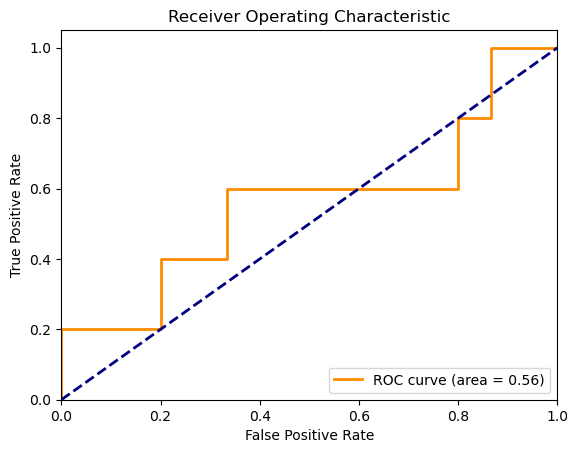

Classification Report:
              precision    recall  f1-score   support

           0       0.79      1.00      0.88        15
           1       1.00      0.20      0.33         5

    accuracy                           0.80        20
   macro avg       0.89      0.60      0.61        20
weighted avg       0.84      0.80      0.75        20



In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, auc, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# Example DataFrame creation (replace this with your real dataset)
np.random.seed(0)
df = pd.DataFrame({
    'num_feature1': np.random.rand(100) * 100,
    'num_feature2': np.random.rand(100) * 100,
    'cat_feature1': np.random.choice(['A', 'B', 'C'], 100),
    'cat_feature2': np.random.choice(['X', 'Y'], 100),
    'target_column': np.random.choice([0, 1], 100, p=[0.7, 0.3])  # Simulate imbalance
})

# Define features and target
X = df.drop('target_column', axis=1)
y = df['target_column']

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['num_feature1', 'num_feature2']),
        ('cat', OneHotEncoder(), ['cat_feature1', 'cat_feature2'])
    ])

# Logistic Regression pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression(max_iter=1000, random_state=42))])

# Stratified train-test split for imbalance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Fit model
pipeline.fit(X_train, y_train)

# Evaluate model
probs = pipeline.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Classification report
y_pred = pipeline.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

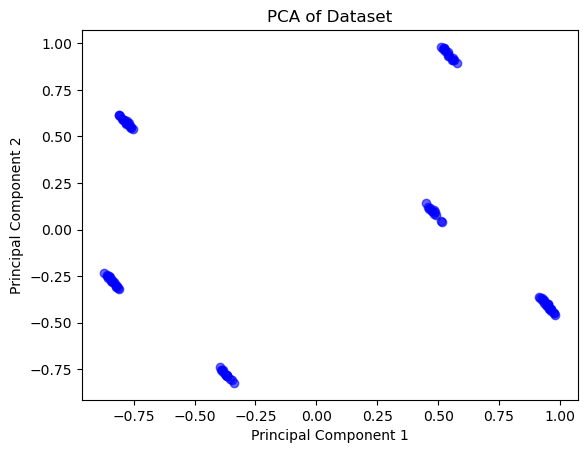

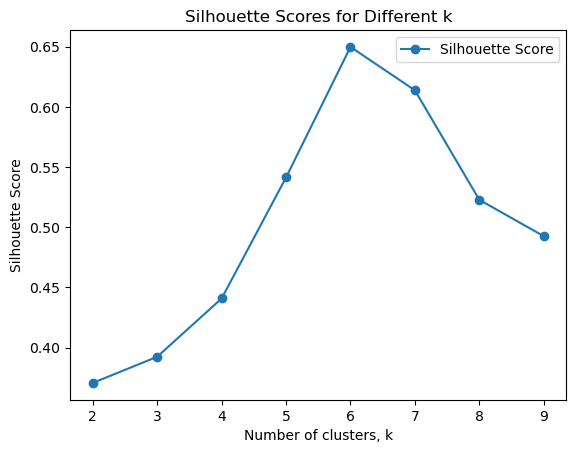

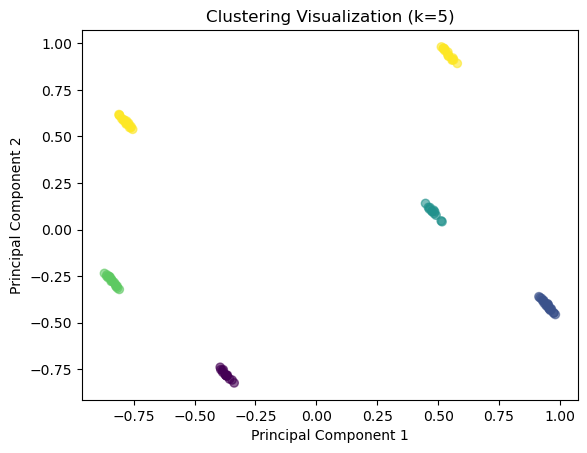

In [14]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), ['num_feature1', 'num_feature2']),
        ('cat', OneHotEncoder(), ['cat_feature1', 'cat_feature2'])
    ])

X = preprocessor.fit_transform(df)

# PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.6, c='blue')
plt.title('PCA of Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Explore clustering for different k values
ks = range(2, 10)
inertias = []
silhouettes = []

for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X, kmeans.labels_))

# Plot silhouette scores
plt.figure()
plt.plot(ks, silhouettes, '-o', label='Silhouette Score')
plt.xlabel('Number of clusters, k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different k')
plt.legend()
plt.xticks(ks)
plt.show()

# Final clustering with optimal k=5
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X)
clusters = kmeans.labels_

# Plot PCA with cluster assignments
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.title(f'Clustering Visualization (k={optimal_k})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()